In [1]:
#import dataframe and plot library
import pandas as pd
import matplotlib.pyplot as plt
import math


In [2]:
#initialize the data
cols = ['x1','x2','x3','x4','class','binary','t1','t2','t3','t4','bias','target','sigmoid','prediction','error','dt1','dt2','dt3','dt4','dbias']
df_training = pd.read_csv("C:/Users/aftermath/Documents/Machine Learning/tugas2/iris.data", header=None, names=cols)
df_training.head(100)
df_training = df_training.head(100)

for i in range(100):
    if df_training.at[i,'class']=='Iris-setosa':
        df_training.at[i,'binary'] = 0
    elif df_training.at[i,'class']=='Iris-versicolor':
        df_training.at[i,'binary'] = 1


In [3]:
#divide data into k-fold, 300 epoch
df_k1 = df_training.iloc[0:80]
df_epoch_1 = df_k1
for i in range(0,299):
    df_k1 = df_k1.append(df_epoch_1,ignore_index=True, sort=False)
df_k1_validation = df_training.iloc[80:100]
df_k1_validation = df_k1_validation.reset_index(drop=True)

df_k2 = df_training.iloc[0:60]
df_k2 = df_k2.append(df_training.iloc[80:100],ignore_index=True, sort=False)
df_epoch_2 = df_k2
for i in range(0,299):
    df_k2 = df_k2.append(df_epoch_2,ignore_index=True, sort=False)
df_k2_validation = df_training.iloc[60:80]
df_k2_validation = df_k2_validation.reset_index(drop=True)

df_k3 = df_training.iloc[0:40]
df_k3 = df_k3.append(df_training.iloc[60:100],ignore_index=True, sort=False)
df_epoch_3 = df_k3
for i in range(0,299):
    df_k3 = df_k3.append(df_epoch_3,ignore_index=True, sort=False)
df_k3_validation = df_training.iloc[40:60]
df_k3_validation = df_k3_validation.reset_index(drop=True)

df_k4 = df_training.iloc[0:20]
df_k4 = df_k4.append(df_training.iloc[40:100],ignore_index=True, sort=False)
df_epoch_4 = df_k4
for i in range(0,299):
    df_k4 = df_k4.append(df_epoch_4,ignore_index=True, sort=False)
df_k4_validation = df_training.iloc[20:40]
df_k4_validation = df_k4_validation.reset_index(drop=True)

df_k5 = df_training.iloc[20:100]
df_epoch_5 = df_k5
for i in range(0,299):
    df_k5 = df_k5.append(df_epoch_5,ignore_index=True, sort=False)
df_k5_validation = df_training.iloc[0:20]
df_k5_validation = df_k5_validation.reset_index(drop=True)


In [4]:
#initialize first row of each epoch
df_k1.at[0,'t1'] = df_k1.at[0,'t2'] = df_k1.at[0,'t3'] = df_k1.at[0,'t4']= df_k1.at[0,'bias'] = 0.5

df_k1.at[0,'target']= df_k1.at[0,'x1']*df_k1.at[0,'t1']+df_k1.at[0,'x2']*df_k1.at[0,'t2']+df_k1.at[0,'x3']*df_k1.at[0,'t3']+df_k1.at[0,'x4']*df_k1.at[0,'t4']+df_k1.at[0,'bias']
df_k1.at[0,'sigmoid']= 1/(1+math.exp(-df_k1.at[0,'target']))
if df_k1.at[0,'sigmoid']>0.5:
    df_k1.at[0,'prediction']= 1
else:
    df_k1.at[0,'prediction']= 0   
df_k1.at[0,'error']= math.pow(df_k1.at[0,'binary']-df_k1.at[0,'sigmoid'],2)
df_k1.at[0,'dt1']= 2*df_k1.at[0,'x1']*(df_k1.at[0,'binary']-df_k1.at[0,'sigmoid'])*(1-df_k1.at[0,'sigmoid'])*df_k1.at[0,'sigmoid']
df_k1.at[0,'dt2']= 2*df_k1.at[0,'x2']*(df_k1.at[0,'binary']-df_k1.at[0,'sigmoid'])*(1-df_k1.at[0,'sigmoid'])*df_k1.at[0,'sigmoid']
df_k1.at[0,'dt3']= 2*df_k1.at[0,'x3']*(df_k1.at[0,'binary']-df_k1.at[0,'sigmoid'])*(1-df_k1.at[0,'sigmoid'])*df_k1.at[0,'sigmoid']
df_k1.at[0,'dt4']= 2*df_k1.at[0,'x4']*(df_k1.at[0,'binary']-df_k1.at[0,'sigmoid'])*(1-df_k1.at[0,'sigmoid'])*df_k1.at[0,'sigmoid']
df_k1.at[0,'dbias']= 2*(df_k1.at[0,'binary']-df_k1.at[0,'sigmoid'])*(1-df_k1.at[0,'sigmoid'])*df_k1.at[0,'sigmoid']



df_k2.at[0,'t1'] = df_k2.at[0,'t2'] = df_k2.at[0,'t3'] = df_k2.at[0,'t4']=  df_k2.at[0,'bias'] = 0.5 

df_k2.at[0,'target']= df_k2.at[0,'x1']*df_k2.at[0,'t1']+df_k2.at[0,'x2']*df_k2.at[0,'t2']+df_k2.at[0,'x3']*df_k2.at[0,'t3']+df_k2.at[0,'x4']*df_k2.at[0,'t4']+df_k2.at[0,'bias']
df_k2.at[0,'sigmoid']= 1/(1+math.exp(-df_k2.at[0,'target']))
if df_k2.at[0,'sigmoid']>0.5:
    df_k2.at[0,'prediction']= 1
else:
    df_k2.at[0,'prediction']= 0   
df_k2.at[0,'error']= math.pow(df_k2.at[0,'binary']-df_k2.at[0,'sigmoid'],2)
df_k2.at[0,'dt1']= 2*df_k2.at[0,'x1']*(df_k2.at[0,'binary']-df_k2.at[0,'sigmoid'])*(1-df_k2.at[0,'sigmoid'])*df_k2.at[0,'sigmoid']
df_k2.at[0,'dt2']= 2*df_k2.at[0,'x2']*(df_k2.at[0,'binary']-df_k2.at[0,'sigmoid'])*(1-df_k2.at[0,'sigmoid'])*df_k2.at[0,'sigmoid']
df_k2.at[0,'dt3']= 2*df_k2.at[0,'x3']*(df_k2.at[0,'binary']-df_k2.at[0,'sigmoid'])*(1-df_k2.at[0,'sigmoid'])*df_k2.at[0,'sigmoid']
df_k2.at[0,'dt4']= 2*df_k2.at[0,'x4']*(df_k2.at[0,'binary']-df_k2.at[0,'sigmoid'])*(1-df_k2.at[0,'sigmoid'])*df_k2.at[0,'sigmoid']
df_k2.at[0,'dbias']= 2*(df_k2.at[0,'binary']-df_k2.at[0,'sigmoid'])*(1-df_k2.at[0,'sigmoid'])*df_k2.at[0,'sigmoid']



df_k3.at[0,'t1'] = df_k3.at[0,'t2'] = df_k3.at[0,'t3'] = df_k3.at[0,'t4']=  df_k3.at[0,'bias'] = 0.5

df_k3.at[0,'target']= df_k3.at[0,'x1']*df_k3.at[0,'t1']+df_k3.at[0,'x2']*df_k3.at[0,'t2']+df_k3.at[0,'x3']*df_k3.at[0,'t3']+df_k3.at[0,'x4']*df_k3.at[0,'t4']+df_k3.at[0,'bias']
df_k3.at[0,'sigmoid']= 1/(1+math.exp(-df_k3.at[0,'target']))
if df_k3.at[0,'sigmoid']>0.5:
    df_k3.at[0,'prediction']= 1
else:
    df_k3.at[0,'prediction']= 0   
df_k3.at[0,'error']= math.pow(df_k3.at[0,'binary']-df_k3.at[0,'sigmoid'],2)
df_k3.at[0,'dt1']= 2*df_k3.at[0,'x1']*(df_k3.at[0,'binary']-df_k3.at[0,'sigmoid'])*(1-df_k3.at[0,'sigmoid'])*df_k3.at[0,'sigmoid']
df_k3.at[0,'dt2']= 2*df_k3.at[0,'x2']*(df_k3.at[0,'binary']-df_k3.at[0,'sigmoid'])*(1-df_k3.at[0,'sigmoid'])*df_k3.at[0,'sigmoid']
df_k3.at[0,'dt3']= 2*df_k3.at[0,'x3']*(df_k3.at[0,'binary']-df_k3.at[0,'sigmoid'])*(1-df_k3.at[0,'sigmoid'])*df_k3.at[0,'sigmoid']
df_k3.at[0,'dt4']= 2*df_k3.at[0,'x4']*(df_k3.at[0,'binary']-df_k3.at[0,'sigmoid'])*(1-df_k3.at[0,'sigmoid'])*df_k3.at[0,'sigmoid']
df_k3.at[0,'dbias']= 2*(df_k3.at[0,'binary']-df_k3.at[0,'sigmoid'])*(1-df_k3.at[0,'sigmoid'])*df_k3.at[0,'sigmoid']



df_k4.at[0,'t1'] = df_k4.at[0,'t2'] = df_k4.at[0,'t3'] = df_k4.at[0,'t4']= df_k4.at[0,'bias'] = 0.5

df_k4.at[0,'target']= df_k4.at[0,'x1']*df_k4.at[0,'t1']+df_k4.at[0,'x2']*df_k4.at[0,'t2']+df_k4.at[0,'x3']*df_k4.at[0,'t3']+df_k4.at[0,'x4']*df_k4.at[0,'t4']+df_k4.at[0,'bias']
df_k4.at[0,'sigmoid']= 1/(1+math.exp(-df_k4.at[0,'target']))
if df_k4.at[0,'sigmoid']>0.5:
    df_k4.at[0,'prediction']= 1
else:
    df_k4.at[0,'prediction']= 0   
df_k4.at[0,'error']= math.pow(df_k4.at[0,'binary']-df_k4.at[0,'sigmoid'],2)
df_k4.at[0,'dt1']= 2*df_k4.at[0,'x1']*(df_k4.at[0,'binary']-df_k4.at[0,'sigmoid'])*(1-df_k4.at[0,'sigmoid'])*df_k4.at[0,'sigmoid']
df_k4.at[0,'dt2']= 2*df_k4.at[0,'x2']*(df_k4.at[0,'binary']-df_k4.at[0,'sigmoid'])*(1-df_k4.at[0,'sigmoid'])*df_k4.at[0,'sigmoid']
df_k4.at[0,'dt3']= 2*df_k4.at[0,'x3']*(df_k4.at[0,'binary']-df_k4.at[0,'sigmoid'])*(1-df_k4.at[0,'sigmoid'])*df_k4.at[0,'sigmoid']
df_k4.at[0,'dt4']= 2*df_k4.at[0,'x4']*(df_k4.at[0,'binary']-df_k4.at[0,'sigmoid'])*(1-df_k4.at[0,'sigmoid'])*df_k4.at[0,'sigmoid']
df_k4.at[0,'dbias']= 2*(df_k4.at[0,'binary']-df_k4.at[0,'sigmoid'])*(1-df_k4.at[0,'sigmoid'])*df_k4.at[0,'sigmoid']



df_k5.at[0,'t1'] = df_k5.at[0,'t2'] = df_k5.at[0,'t3'] = df_k5.at[0,'t4']= df_k5.at[0,'bias'] = 0.5

df_k5.at[0,'target']= df_k5.at[0,'x1']*df_k5.at[0,'t1']+df_k5.at[0,'x2']*df_k5.at[0,'t2']+df_k5.at[0,'x3']*df_k5.at[0,'t3']+df_k5.at[0,'x4']*df_k5.at[0,'t4']+df_k5.at[0,'bias']
df_k5.at[0,'sigmoid']= 1/(1+math.exp(-df_k5.at[0,'target']))
if df_k5.at[0,'sigmoid']>0.5:
    df_k5.at[0,'prediction']= 1
else:
    df_k5.at[0,'prediction']= 0   
df_k5.at[0,'error']= math.pow(df_k5.at[0,'binary']-df_k5.at[0,'sigmoid'],2)
df_k5.at[0,'dt1']= 2*df_k5.at[0,'x1']*(df_k5.at[0,'binary']-df_k5.at[0,'sigmoid'])*(1-df_k5.at[0,'sigmoid'])*df_k5.at[0,'sigmoid']
df_k5.at[0,'dt2']= 2*df_k5.at[0,'x2']*(df_k5.at[0,'binary']-df_k5.at[0,'sigmoid'])*(1-df_k5.at[0,'sigmoid'])*df_k5.at[0,'sigmoid']
df_k5.at[0,'dt3']= 2*df_k5.at[0,'x3']*(df_k5.at[0,'binary']-df_k5.at[0,'sigmoid'])*(1-df_k5.at[0,'sigmoid'])*df_k5.at[0,'sigmoid']
df_k5.at[0,'dt4']= 2*df_k5.at[0,'x4']*(df_k5.at[0,'binary']-df_k5.at[0,'sigmoid'])*(1-df_k5.at[0,'sigmoid'])*df_k5.at[0,'sigmoid']
df_k5.at[0,'dbias']= 2*(df_k5.at[0,'binary']-df_k5.at[0,'sigmoid'])*(1-df_k5.at[0,'sigmoid'])*df_k5.at[0,'sigmoid']



input k-fold index: 5
input learning rate: 0.8
K-1 Learning Rate:  0.8  Epochs:300


Text(0,0.5,'error percentage')

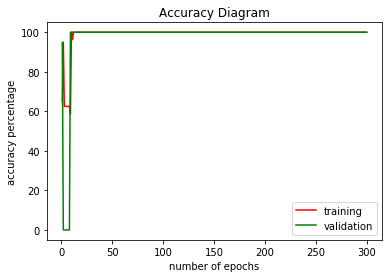

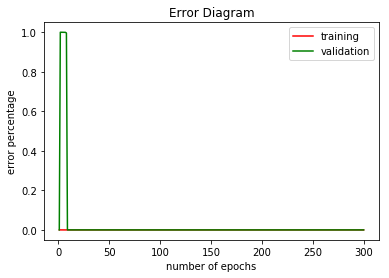

In [12]:
#k-fold run, learning rate learningrate
%matplotlib inline
counter=1
correcttraining=0
correctvalidate=0

ploterrortrain = []
ploterrorvalidate = []
plotcorrecttrain = []
plotcorrectvalidate = []
plotcounter = []


inputs = input("input k-fold index: ")
inputs = int(inputs)

if inputs == 1:
    df = df_k1
    dfv = df_k1_validation
elif inputs == 2:
    df = df_k2
    dfv = df_k2_validation
elif inputs == 3:
    df = df_k3
    dfv = df_k3_validation
elif inputs == 4:
    df = df_k4
    dfv = df_k4_validation
elif inputs == 5:
    df = df_k5
    dfv = df_k5_validation
else:
    print("range 1-5 only")

learningrate = input("input learning rate: ")
learningrate = float(learningrate)


fig, plotaccuracy = plt.subplots()
fig, ploterror = plt.subplots()

for i in range(1,df.shape[0]):
    counter = counter + 1
    df.at[i,'t1'] = df.at[i-1,'t1']+learningrate*df.at[i-1,'dt1']
    df.at[i,'t2'] = df.at[i-1,'t2']+learningrate*df.at[i-1,'dt2']
    df.at[i,'t3'] = df.at[i-1,'t3']+learningrate*df.at[i-1,'dt3']
    df.at[i,'t4'] = df.at[i-1,'t4']+learningrate*df.at[i-1,'dt4']
    df.at[i,'bias'] = df.at[i-1,'bias']+learningrate*df.at[i-1,'dbias']
    
    df.at[i,'target']= df.at[i,'x1']*df.at[i,'t1']+df.at[i,'x2']*df.at[i,'t2']+df.at[i,'x3']*df.at[i,'t3']+df.at[i,'x4']*df.at[i,'t4']+df.at[i,'bias']
    df.at[i,'sigmoid']= 1/(1+math.exp(-df.at[i,'target']))
    
    if df.at[i,'sigmoid']>0.5:
        df.at[i,'prediction']= 1
    else:
        df.at[i,'prediction']= 0   
        
    df.at[i,'error']= math.pow(df.at[i,'binary']-df.at[i,'sigmoid'],2)
    df.at[i,'dt1']= 2*df.at[i,'x1']*(df.at[i,'binary']-df.at[i,'sigmoid'])*(1-df.at[i,'sigmoid'])*df.at[i,'sigmoid']
    df.at[i,'dt2']= 2*df.at[i,'x2']*(df.at[i,'binary']-df.at[i,'sigmoid'])*(1-df.at[i,'sigmoid'])*df.at[i,'sigmoid']
    df.at[i,'dt3']= 2*df.at[i,'x3']*(df.at[i,'binary']-df.at[i,'sigmoid'])*(1-df.at[i,'sigmoid'])*df.at[i,'sigmoid']
    df.at[i,'dt4']= 2*df.at[i,'x4']*(df.at[i,'binary']-df.at[i,'sigmoid'])*(1-df.at[i,'sigmoid'])*df.at[i,'sigmoid']
    df.at[i,'dbias']= 2*(df.at[i,'binary']-df.at[i,'sigmoid'])*(1-df.at[i,'sigmoid'])*df.at[i,'sigmoid']
    
    if df.at[i,'prediction'] == df.at[i,'binary'] :
        correcttraining = correcttraining + 1
        
    if counter % 80 == 0 : 
        df_validating = dfv
        df_validating.at[0,'t1'] = df.at[i,'t1']
        df_validating.at[0,'t2'] = df.at[i,'t2']
        df_validating.at[0,'t3'] = df.at[i,'t3']
        df_validating.at[0,'t4'] = df.at[i,'t4']
        df_validating.at[0,'bias'] = df.at[i,'bias']
        df_validating.at[0,'target'] = df.at[i,'target']
        df_validating.at[0,'sigmoid'] = df.at[i,'sigmoid']
        df_validating.at[0,'prediction'] = df.at[i,'prediction']
        df_validating.at[0,'error'] = df.at[i,'error']
        df_validating.at[0,'dt1'] = df.at[i,'dt1']
        df_validating.at[0,'dt2'] = df.at[i,'dt2']
        df_validating.at[0,'dt3'] = df.at[i,'dt3']
        df_validating.at[0,'dt4'] = df.at[i,'dt4']
        df_validating.at[0,'dbias'] = df.at[i,'dbias']
        
        ploterrortrain.append(df_validating.at[0,'error'])
        
        for i in range(1,df_validating.shape[0]):

            df_validating.at[i,'t1'] = df_validating.at[i-1,'t1']+learningrate*df_validating.at[i-1,'dt1']
            df_validating.at[i,'t2'] = df_validating.at[i-1,'t2']+learningrate*df_validating.at[i-1,'dt2']
            df_validating.at[i,'t3'] = df_validating.at[i-1,'t3']+learningrate*df_validating.at[i-1,'dt3']
            df_validating.at[i,'t4'] = df_validating.at[i-1,'t4']+learningrate*df_validating.at[i-1,'dt4']
            df_validating.at[i,'bias'] = df_validating.at[i-1,'bias']+learningrate*df_validating.at[i-1,'dbias']

            df_validating.at[i,'target']= df_validating.at[i,'x1']*df_validating.at[i,'t1']+df_validating.at[i,'x2']*df_validating.at[i,'t2']+df_validating.at[i,'x3']*df_validating.at[i,'t3']+df_validating.at[i,'x4']*df_validating.at[i,'t4']+df_validating.at[i,'bias']
            df_validating.at[i,'sigmoid']= 1/(1+math.exp(-df_validating.at[i,'target']))
            
            if df_validating.at[i,'sigmoid']>0.5:
                df_validating.at[i,'prediction']= 1
            else:
                df_validating.at[i,'prediction']= 0   
                
            df_validating.at[i,'error']= math.pow(df_validating.at[i,'binary']-df_validating.at[i,'sigmoid'],2)
            df_validating.at[i,'dt1']= 2*df_validating.at[i,'x1']*(df_validating.at[i,'binary']-df_validating.at[i,'sigmoid'])*(1-df_validating.at[i,'sigmoid'])*df_validating.at[i,'sigmoid']
            df_validating.at[i,'dt2']= 2*df_validating.at[i,'x2']*(df_validating.at[i,'binary']-df_validating.at[i,'sigmoid'])*(1-df_validating.at[i,'sigmoid'])*df_validating.at[i,'sigmoid']
            df_validating.at[i,'dt3']= 2*df_validating.at[i,'x3']*(df_validating.at[i,'binary']-df_validating.at[i,'sigmoid'])*(1-df_validating.at[i,'sigmoid'])*df_validating.at[i,'sigmoid']
            df_validating.at[i,'dt4']= 2*df_validating.at[i,'x4']*(df_validating.at[i,'binary']-df_validating.at[i,'sigmoid'])*(1-df_validating.at[i,'sigmoid'])*df_validating.at[i,'sigmoid']
            df_validating.at[i,'dbias']= 2*(df_validating.at[i,'binary']-df_validating.at[i,'sigmoid'])*(1-df_validating.at[i,'sigmoid'])*df_validating.at[i,'sigmoid']

            if df_validating.at[i,'prediction'] == df_validating.at[i,'binary'] :
                correctvalidate = correctvalidate+1
        
        ploterrorvalidate.append(df_validating.at[19,'error'] )
        #print("correct training: ",correcttraining, "correct validate: ",correctvalidate,"\n")
        plotcorrecttrain.append(100*correcttraining/80)
        plotcorrectvalidate.append(100*correctvalidate/19)
        plotcounter.append(counter/80)
        
        correcttraining = correctvalidate = 0

print("K-1 Learning Rate: ",learningrate," Epochs:300")
plotaccuracy.plot(plotcounter, plotcorrecttrain, color="red",label="training")
plotaccuracy.plot(plotcounter, plotcorrectvalidate, color = "green", label = "validation")
plotaccuracy.legend(loc = "lower right") 
plotaccuracy.set_title("Accuracy Diagram")
plotaccuracy.set_xlabel("number of epochs")
plotaccuracy.set_ylabel("accuracy percentage")


ploterror.plot(plotcounter, ploterrortrain, color = "red",label = "training")
ploterror.plot(plotcounter, ploterrorvalidate, color = "green", label = "validation")
ploterror.legend(loc = "upper right")
ploterror.set_title("Error Diagram")
ploterror.set_xlabel("number of epochs")
ploterror.set_ylabel("error percentage")

